In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
from IPython.display import display
from scipy import stats

ModuleNotFoundError: No module named 'seaborn'

In [44]:
pd.options.display.float_format = '{:.4f}'.format

# Metrics: Spearman
To see if we've improved upon the results, let's see if we've improved Spearman's correlation.

In [11]:
gdsc_df = pd.read_csv('data/IC50_quantized.csv') # GDSC experimental results

In [12]:
# top 10
sensitive = gdsc_df[gdsc_df['sensitivity'] == 'sensitive']
sensitive[(sensitive['cell_line_id'] == 683665)].nsmallest(10, 'log_IC50')

,drug_id,cell_line_id,log_IC50,sensitivity
206838,1248,683665,-6.84,sensitive
105135,283,683665,-5.40,sensitive
140093,1004,683665,-5.12,sensitive
19296,135,683665,-4.41,sensitive
93506,268,683665,-4.41,sensitive
137358,346,683665,-4.25,sensitive
177059,1057,683665,-4.06,sensitive
146325,1011,683665,-3.77,sensitive
64294,208,683665,-3.72,sensitive
56699,200,683665,-3.70,sensitive


In [27]:
def get_top_10(df):
    df_values = {'cell_line_id': [], 'top_10_drug_ids': []}
    sensitive = df[df['sensitivity'] == 'sensitive']
    for idx in df['cell_line_id'].unique():
        top10 = sensitive[(sensitive['cell_line_id'] == idx)
                  ].nsmallest(10, 'log_IC50')['drug_id']
        df_values['cell_line_id'].append(idx)
        df_values['top_10_drug_ids'].append(','.join(
            [str(elm) for elm in top10.values])[:-1])
    return pd.DataFrame(df_values)

## Analyze Fitted Data

In [30]:
part1_df = pd.read_csv('data/drug_df_part1.csv')
pca_df = pd.read_csv('data/drug_df_pca.csv')
racs_df = pd.read_csv('data/drug_df_racs.csv')

In [79]:
part1_top10 = get_top_10(part1_df)
pca_top10 = get_top_10(pca_df)
racs_top10 = get_top_10(racs_df)

In [80]:
part1_top10.head()

,cell_line_id,top_10_drug_ids
0,683665,"1248,283,1004,135,268,346,1057,1011,208,20"
1,684055,"1494,268,1248,180,346,208,1057,136,194,13"
2,684057,"283,1007,1003,268,1004,346,1248,1057,208,20"
3,684059,"1494,1007,1003,104,1248,346,268,283,1031,100"
4,684062,"1007,283,1003,268,1031,1004,346,200,194,18"


In [81]:
part1_top10.to_csv('data/part1_top10_per_cell_line.csv', index=False)
pca_top10.to_csv('data/pca_top10_per_cell_line.csv', index=False)
racs_top10.to_csv('data/racs_top10_per_cell_line.csv', index=False)

In [84]:
# save as latex for PDF report
with open('data/temp.txt', 'wt') as f:
    f.write(racs_top10.sample(n=5).to_latex(index=False))

### Take cell line with id 683665 as an example

In [33]:
gdc_log_IC50 = gdsc_df.loc[gdsc_df['cell_line_id'] == 683665, 
                           'log_IC50']
part1_log_IC50 = part1_df.loc[part1_df['cell_line_id'] == 683665, 
                              'predicted_log_IC50']
pca_log_IC50 = pca_df.loc[pca_df['cell_line_id'] == 683665, 
                          'predicted_log_IC50']
racs_log_IC50 = racs_df.loc[racs_df['cell_line_id'] == 683665, 
                                  'predicted_log_IC50']

In [35]:
for ref, pred in product([gdc_log_IC50], [part1_log_IC50, pca_log_IC50, racs_log_IC50]):
    print(stats.spearmanr(ref, pred))

SpearmanrResult(correlation=0.9271997441072767, pvalue=2.612424993888819e-113)
SpearmanrResult(correlation=0.9356550334874899, pvalue=4.613759674374706e-120)
SpearmanrResult(correlation=0.937808518346605, pvalue=6.26345404258059e-122)


Spearman results is above 0.9, meaning that our model ranks the drug similar to their ranks in the original data. Spearman results also increased from our experiments in Part 1 to Part 2. This means that our model is getting better.

In [36]:
df_values = {'cell_line_id': [], 'part1_spearmanr': [],
            'pca_spearmanr': [], 'racs_spearmanr': []}
for idx in gdsc_df['cell_line_id'].unique():
    gdc_log_IC50 = gdsc_df.loc[gdsc_df['cell_line_id'] == idx, 
                           'log_IC50']
    part1_log_IC50 = part1_df.loc[part1_df['cell_line_id'] == idx, 
                                  'predicted_log_IC50']
    pca_log_IC50 = pca_df.loc[pca_df['cell_line_id'] == idx, 
                              'predicted_log_IC50']
    racs_log_IC50 = racs_df.loc[racs_df['cell_line_id'] == idx, 
                                      'predicted_log_IC50']
    
    part1_spearmanr = stats.spearmanr(gdc_log_IC50, part1_log_IC50).correlation
    pca_spearmanr = stats.spearmanr(gdc_log_IC50, pca_log_IC50).correlation
    racs_spearmanr = stats.spearmanr(gdc_log_IC50, racs_log_IC50).correlation
    
    df_values['cell_line_id'].append(idx)
    df_values['part1_spearmanr'].append(part1_spearmanr)
    df_values['pca_spearmanr'].append(pca_spearmanr)
    df_values['racs_spearmanr'].append(racs_spearmanr)

In [37]:
spearman_df = pd.DataFrame(df_values)

In [45]:
display(spearman_df.head())
display(spearman_df.sample(n=10))

,cell_line_id,part1_spearmanr,pca_spearmanr,racs_spearmanr
0,683665,0.9272,0.9357,0.9378
1,684055,0.8506,0.8815,0.8852
2,684057,0.8280,0.8745,0.8736
3,684059,0.8010,0.8530,0.8519
4,684062,0.8135,0.8552,0.8562


,cell_line_id,part1_spearmanr,pca_spearmanr,racs_spearmanr
860,1290730,0.9131,0.9189,0.9125
878,1290908,0.8754,0.8871,0.8852
953,908482,0.8723,0.8697,0.8716
2,684057,0.8280,0.8745,0.8736
743,910946,0.8692,0.8688,0.8703
567,906797,0.9186,0.9196,0.9219
650,908131,0.7520,0.7378,0.7459
91,905970,0.8238,0.8367,0.8361
637,907321,0.9245,0.9232,0.9255
936,1299064,0.8941,0.8906,0.8853


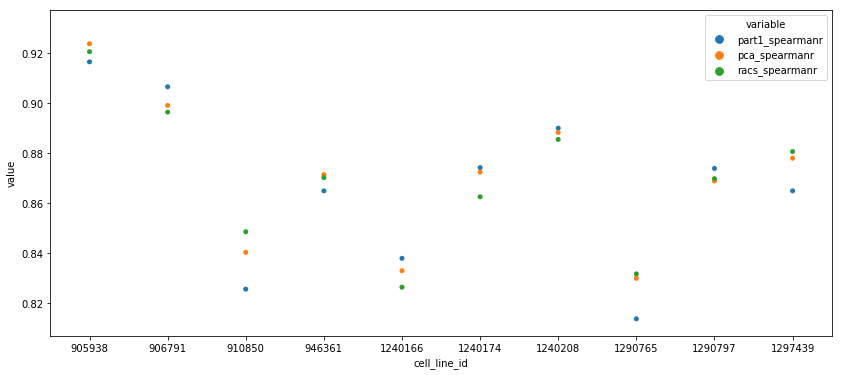

In [78]:
plt.figure(figsize=(14, 6))
temp = spearman_df.sample(n=10)
temp = pd.melt(temp, id_vars=['cell_line_id'], 
               value_vars=temp.columns[1:])
temp['cell_line_id'].astype(str)
ax = sns.stripplot(data=temp, x='cell_line_id', y='value', 
                   hue='variable', jitter=0)

In [48]:
spearman_df.to_csv('data/spearman_df.csv')

In [2]:
spearman_df = pd.read_csv('results/spearman_df.csv')

In [3]:
with open('temp.txt', 'wt') as f:
    f.write(spearman_df.sample(n=5).to_latex(index=False))